# Retail Sales Prediction - Time series forecasting

## Import

In [134]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

## Reading data

In [3]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

In [4]:
df = stores.merge(sales,  how= 'outer')
df = df.merge(features, how = 'outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423325 entries, 0 to 423324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     423325 non-null  object 
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
dtypes: float64(12), int64(1), object(3)
memory usage: 54.9+ MB


In [5]:
data = df
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = df.Date.dt.year
data['Month'] = df.Date.dt.month
data['Day'] = df.Date.dt.day
data.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day
0,1,A,151315.0,1.0,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,5,2
1,1,A,151315.0,2.0,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,5,2
2,1,A,151315.0,3.0,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,5,2
3,1,A,151315.0,4.0,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,5,2
4,1,A,151315.0,5.0,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,5,2


## EDA

### Weekly Sales analysis

Questions we wish to answer:
- Is there any perceivable year on year trend in sales data?

In [6]:
data.Year.unique()

array([2010, 2011, 2012, 2013])

In [7]:
data_2010 = data[data['Year'] == 2010]
data_2011 = data[data['Year'] == 2011]
data_2012 = data[data['Year'] == 2012]
data_2013 = data[data['Year'] == 2013]

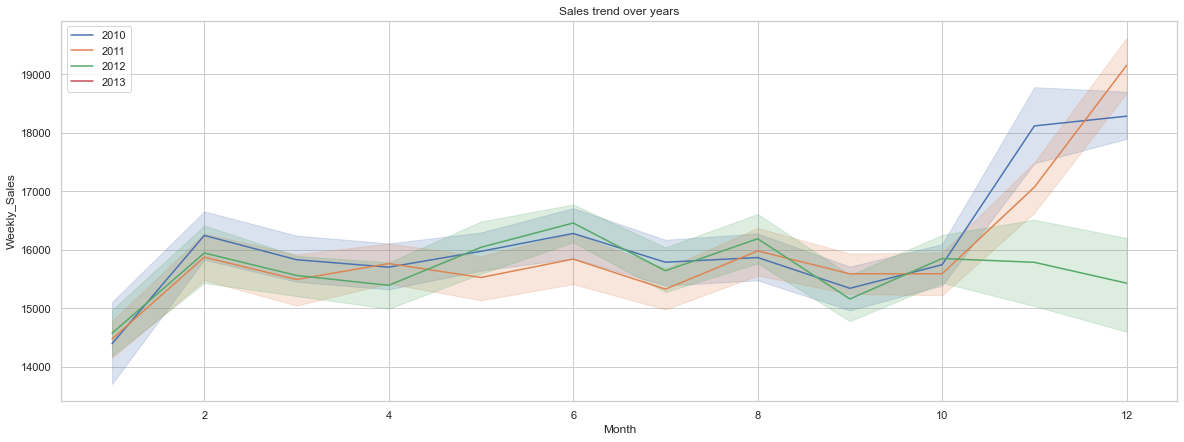

In [354]:
sns.set_theme(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (20,7))
sns.lineplot(x = data.Month, y = data_2010['Weekly_Sales'], label = '2010', ax = ax)
sns.lineplot(x = data.Month, y = data_2011['Weekly_Sales'], label = '2011',ax = ax)
sns.lineplot(x = data.Month, y = data_2012['Weekly_Sales'], label = '2012',ax = ax)
sns.lineplot(x = data.Month, y = data_2013['Weekly_Sales'], label = '2013',ax = ax)
plt.title('Sales trend over years')
plt.show()

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Month'>

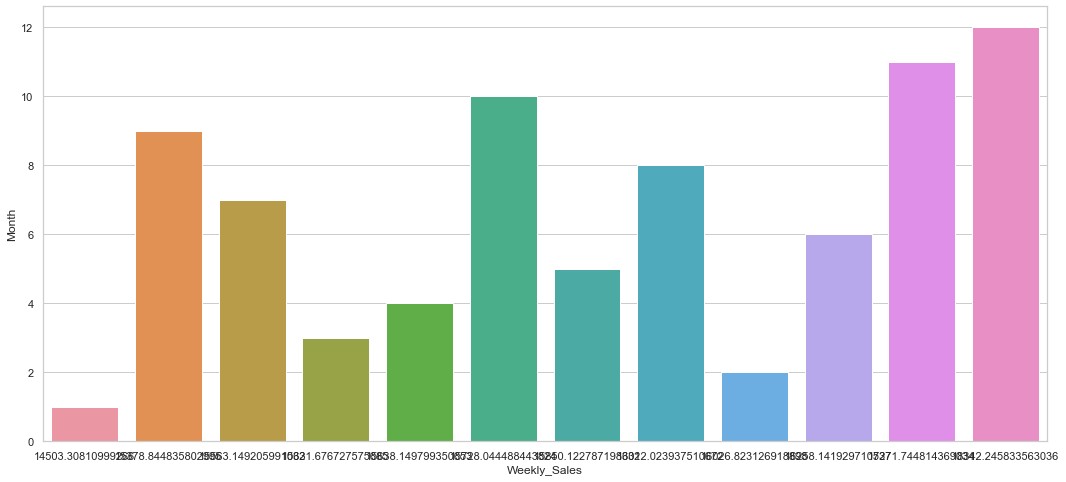

In [339]:
mean_sales = data.groupby('Month')['Weekly_Sales'].mean().reset_index()
sns.barplot(y = 'Month', x = 'Weekly_Sales', data = mean_sales)

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

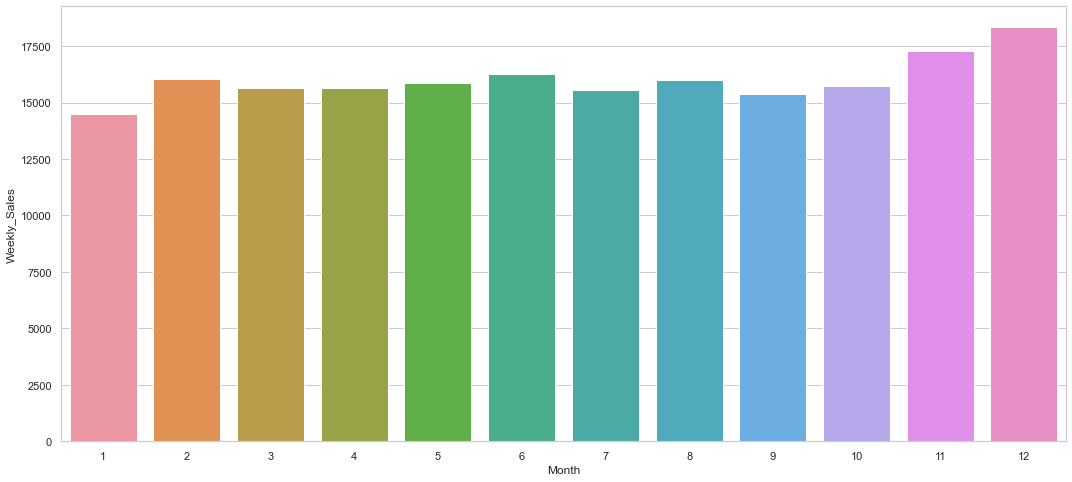

In [343]:
mean_sales = mean_sales.sort_values(by = 'Weekly_Sales')
sns.barplot(x = 'Month', y = 'Weekly_Sales', data = mean_sales)

Yearly sales shows some trends:
    - Sales tend to go up  in February, June, August and October
    - November and Dec sales seems on a different trend with sales of 2013 clearly peaking up. This was also obersved in 2010 and 2011 but not in 2012.
    -January has the lowest sales performance while November and December have the best sales.

### Is Holiday impacting sales?

In [10]:
holiday = data[data['IsHoliday'] == True]

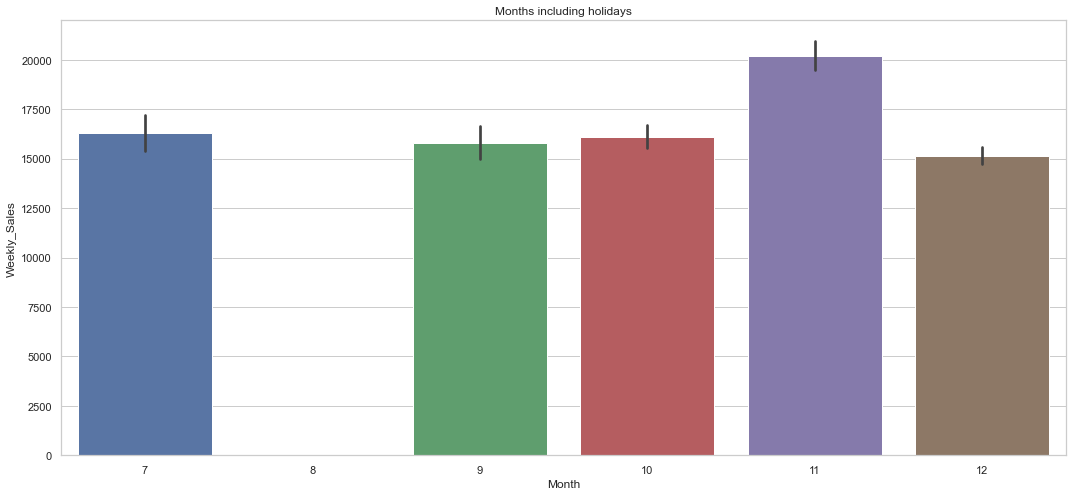

In [355]:
# What are the months which tipically have holidays?
holiday.groupby('Month')['Weekly_Sales'].mean()
sns.barplot(x = holiday.Month, y = holiday.Weekly_Sales)
plt.title('Months including holidays')
plt.show()

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


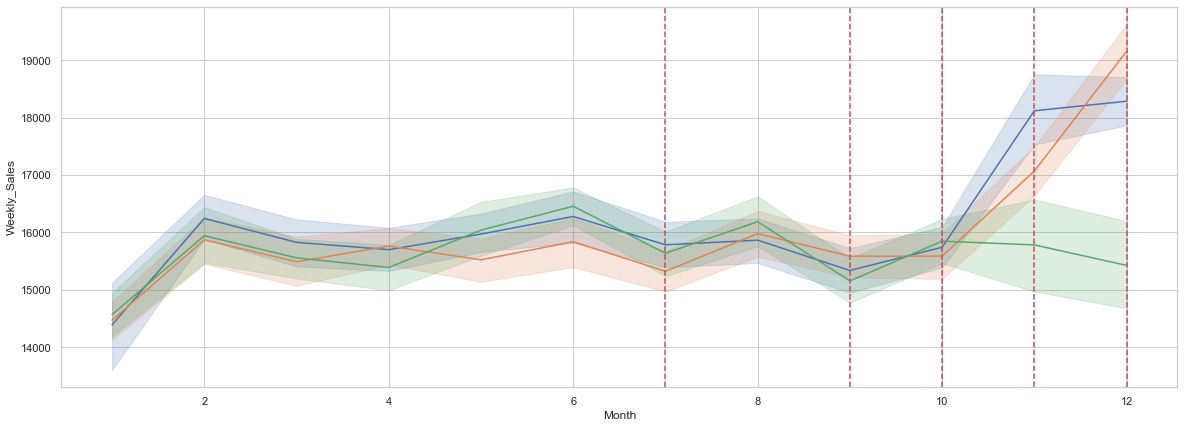

In [12]:
sns.set_theme(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (20,7))
sns.lineplot(x = data.Month, y = data_2010['Weekly_Sales'], ax = ax)
sns.lineplot(x = data.Month, y = data_2011['Weekly_Sales'], ax = ax)
sns.lineplot(x = data.Month, y = data_2012['Weekly_Sales'], ax = ax)
sns.lineplot(x = data.Month, y = data_2013['Weekly_Sales'], ax = ax)
plt.axvline(x=7,color = 'r', linestyle = '--')
plt.axvline(x=9,color = 'r', linestyle = '--')
plt.axvline(x=10,color = 'r', linestyle = '--')
plt.axvline(x=11,color = 'r', linestyle = '--')
plt.axvline(x=12,color = 'r', linestyle = '--')

Holidays doesnt seem to impact sales. At the exception of the x-mas period, others holiday do not impact the sales by much compared to the months without holiday.

average sales during holiday vs sales without holiday

### Which stores sells the most?

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Store'>

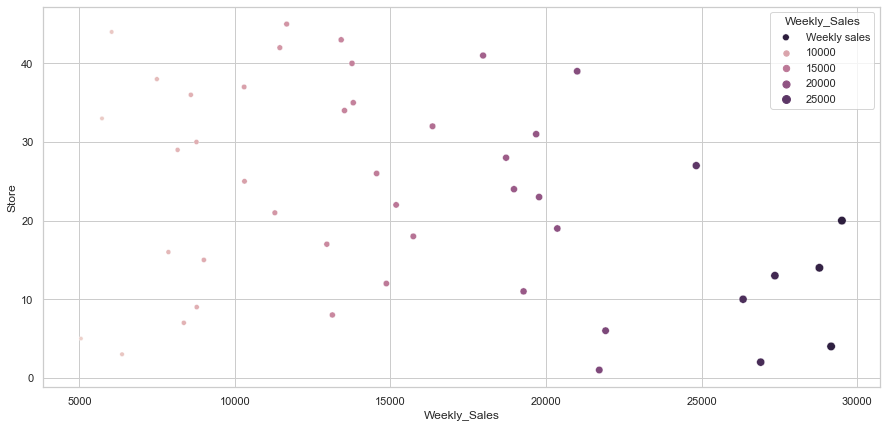

In [346]:
store = data.groupby('Store')['Weekly_Sales'].mean().reset_index()
store.set_index('Store')
store = store.sort_values(by= 'Weekly_Sales', ascending = False)

f, ax= plt.subplots(figsize= (15,7))
sns.scatterplot(x = 'Weekly_Sales', y = 'Store', hue = 'Weekly_Sales', size = 'Weekly_Sales', data = store, label = 'Weekly sales')

In [14]:
store.head(10)

,Store,Weekly_Sales
19,20,29508.301592
3,4,29161.210415
13,14,28784.851727
12,13,27355.136891
1,2,26898.070031
9,10,26332.303819
26,27,24826.984536
5,6,21913.243624
0,1,21710.543621
38,39,21000.763562


In [15]:
store.Weekly_Sales.head(10).sum() /store.Weekly_Sales.sum() 

0.37064368782800405

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Type'>

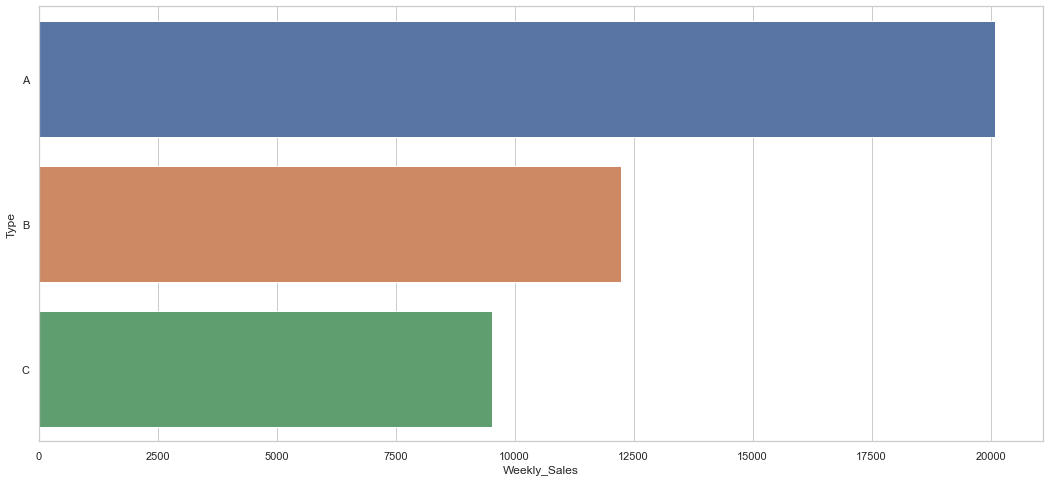

In [384]:
type_store = data.groupby('Type')['Weekly_Sales'].mean().reset_index()
type_store = type_store.sort_values(by= 'Weekly_Sales', ascending = False)

sns.barplot(x = 'Weekly_Sales', y = 'Type',data = type_store, label = 'Weekly sales')

Most important store type is type A

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Dept'>

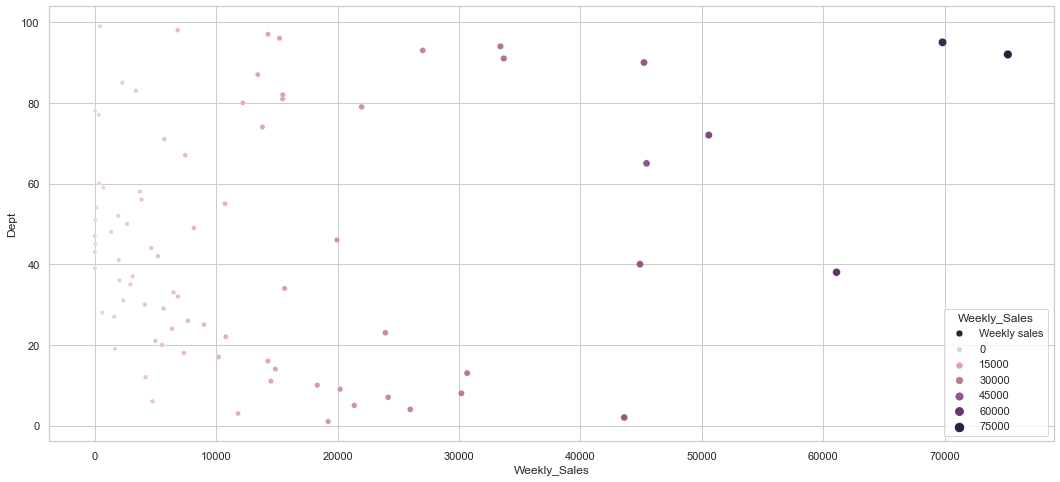

In [380]:
Dept = data.groupby('Dept')['Weekly_Sales'].mean().reset_index()
Dept = Dept.sort_values(by= 'Weekly_Sales', ascending = False)

sns.scatterplot(x = 'Weekly_Sales', y = 'Dept', hue = 'Weekly_Sales', size = 'Weekly_Sales', data = Dept, label = 'Weekly sales')

In [19]:
Dept.head(10)

,Dept,Weekly_Sales
73,92.0,75204.870531
76,95.0,69824.423080
36,38.0,61090.619568
60,72.0,50566.515417
57,65.0,45441.706224
71,90.0,45232.084488
38,40.0,44900.702727
1,2.0,43607.020113
72,91.0,33687.910758
75,94.0,33405.883963


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Size'>

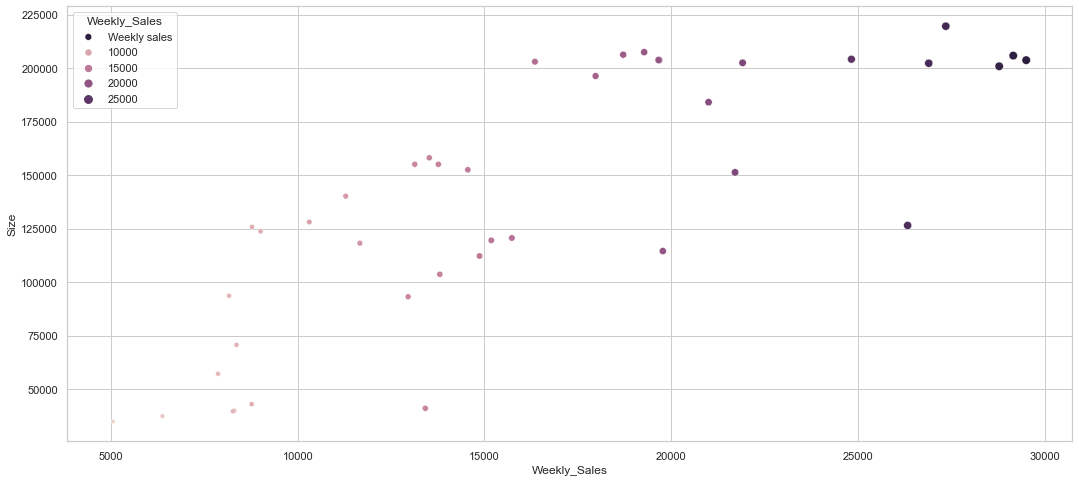

In [351]:
size = data.groupby('Size')['Weekly_Sales'].mean().reset_index()
size = size.sort_values(by= 'Weekly_Sales', ascending = False)

sns.scatterplot(x = 'Weekly_Sales', y = 'Size', hue = 'Weekly_Sales', size = 'Weekly_Sales', data = size, label = 'Weekly sales')

In [21]:
size.head(10)

,Size,Weekly_Sales
32,203742.0,29508.301592
36,205863.0,29161.210415
28,200898.0,28784.851727
39,219622.0,27355.136891
29,202307.0,26898.070031
18,126512.0,26332.303819
35,204184.0,24826.984536
30,202505.0,21913.243624
21,151315.0,21710.543621
26,184109.0,21000.763562


In [22]:
num_cols = ['Weekly_Sales', 
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

<AxesSubplot:>

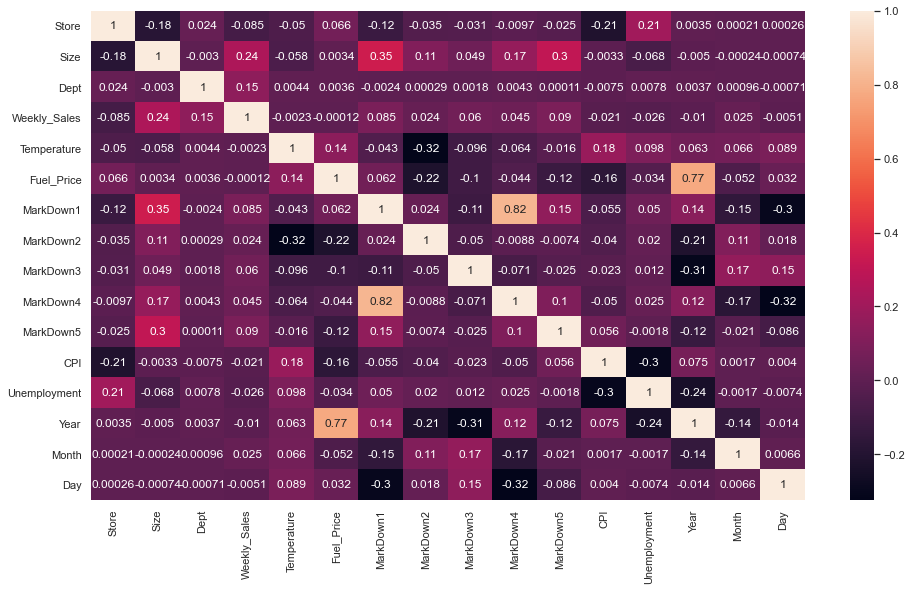

In [23]:
# Plotting the correlation matrix
f, ax = plt.subplots(figsize = (16,9))
sns.heatmap(data.corr(), annot = True)

- Weekly sales are influenced by the size of the store and the department respectively by 24% and 15%
- Other factors have little influence on sales performance (temperature, fuel price, CPI and unemployment).
- Markdowns have typically low impact on sales however, since they only occur during specific period of the year, further analysis is required to understand their impact.
- We observe a lot of collinearity in the data which need to be accounted for prior to modelling: Markdown 1 and 4, fuel price and year.
In summary, forecasting effort should be focused at understanding the impact of markdowns, and improving their effectiveness accross the department and size stores that matter the most.

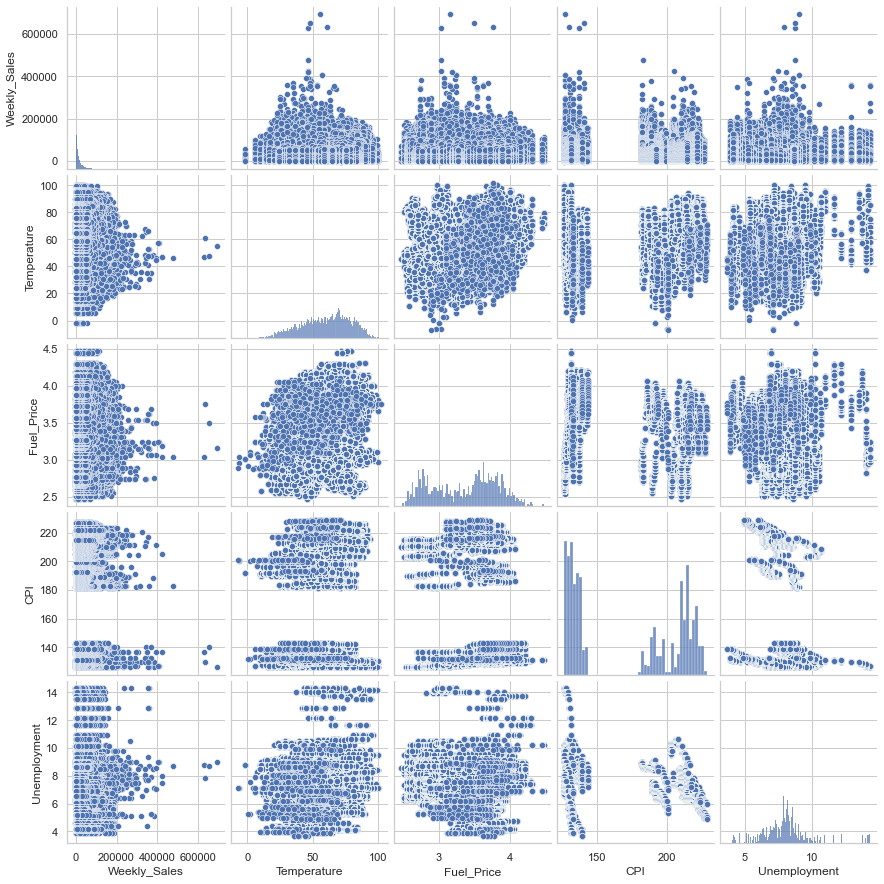

In [24]:
# Pairplot

sns.pairplot(data[num_cols])

### Markdowns analysis

Key questions to answer:
- Are each markdown result in increase of sales?
- What is the optimal markdown value?
- When is the most effective timing for each markdown?

In [25]:
# Extracting data where the Mardown 1 has been active
md1 = data[data['MarkDown1'] > 0]
md2 = data[data['MarkDown2'] > 0]
md3 = data[data['MarkDown3'] > 0]
md4 = data[data['MarkDown4'] > 0]
md5 = data[data['MarkDown5'] > 0]
# Grouping mardown value by monthly average
grouped_md1 = md1.groupby('Month')['MarkDown1'].mean().reset_index()
grouped_md2 = md2.groupby('Month')['MarkDown2'].mean().reset_index()
grouped_md3 = md3.groupby('Month')['MarkDown3'].mean().reset_index()
grouped_md4 = md4.groupby('Month')['MarkDown4'].mean().reset_index()
grouped_md5 = md5.groupby('Month')['MarkDown5'].mean().reset_index()

<AxesSubplot:xlabel='Month', ylabel='MarkDown1'>

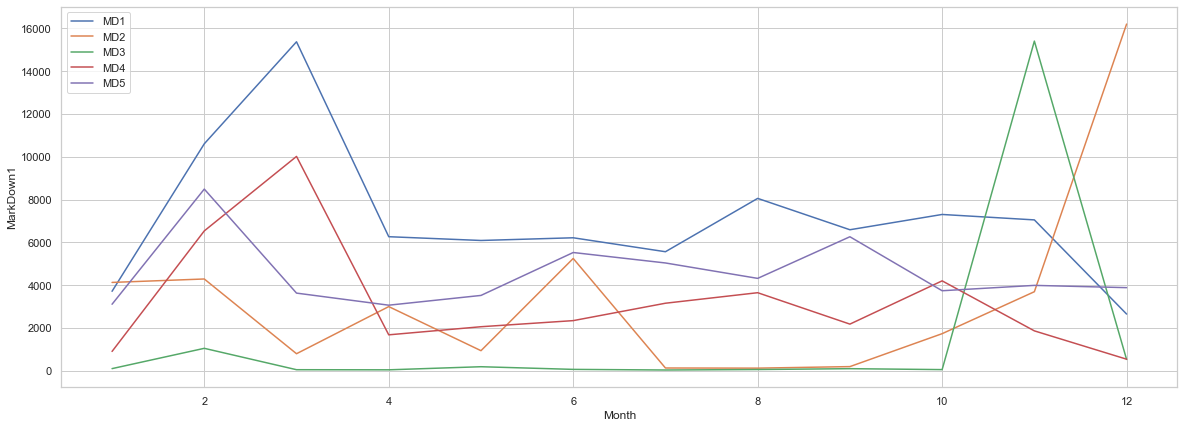

In [26]:
fig, ax = plt.subplots(figsize = (20,7))
sns.lineplot(x= 'Month', y = 'MarkDown1', data = grouped_md1, label = 'MD1', ax = ax )
sns.lineplot(x= 'Month', y = 'MarkDown2', data = grouped_md2, label = 'MD2', ax = ax )
sns.lineplot(x= 'Month', y = 'MarkDown3', data = grouped_md3, label = 'MD3', ax = ax )
sns.lineplot(x= 'Month', y = 'MarkDown4', data = grouped_md4, label = 'MD4', ax = ax )
sns.lineplot(x= 'Month', y = 'MarkDown5', data = grouped_md5, label = 'MD5', ax = ax )

- Markdowns range from 
- Markdowns are happening at the same time
- Markdown 1 has the deepest depth
- Mardowns 1, 5 and 4 are typically on throughout the year and simultaneaously while 2 is off during july till september and 2 has only been active during the month of Feb and Nov 
- Periods ranging from January to February and Oct to Nov typically have the highest markdowns while the rest of the year has a relatively smooth value (exception of markdown2 with ann erratic behavior

are all markdowns happening at the same time in all size and dept

<AxesSubplot:xlabel='Weekly_Sales', ylabel='MarkDown1'>

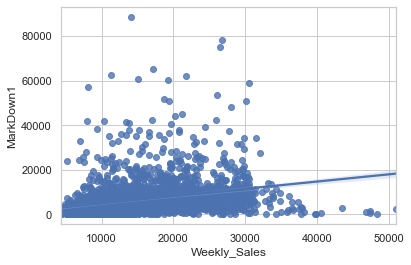

In [27]:
md1_sales = md1.groupby('MarkDown1')['Weekly_Sales'].mean().reset_index()
md1_sales = md1_sales.sort_values(by = 'Weekly_Sales')
sns.regplot(x= 'Weekly_Sales', y = 'MarkDown1', data = md1_sales )

<AxesSubplot:xlabel='Weekly_Sales', ylabel='MarkDown2'>

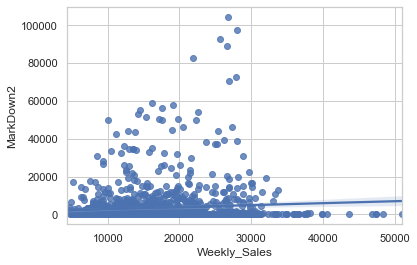

In [28]:
md2_sales = md2.groupby('MarkDown2')['Weekly_Sales'].mean().reset_index()
md2_sales = md2_sales.sort_values(by = 'Weekly_Sales')
sns.regplot(x= 'Weekly_Sales', y = 'MarkDown2', data = md2_sales )

<AxesSubplot:xlabel='Weekly_Sales', ylabel='MarkDown3'>

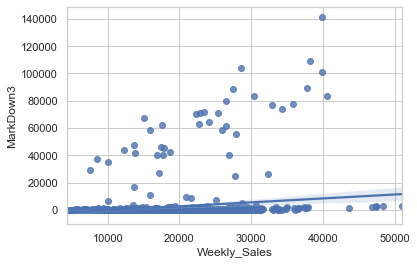

In [29]:
md3_sales = md3.groupby('MarkDown3')['Weekly_Sales'].mean().reset_index()
md3_sales = md3_sales.sort_values(by = 'Weekly_Sales')
sns.regplot(x= 'Weekly_Sales', y = 'MarkDown3', data = md3_sales )

<AxesSubplot:xlabel='Weekly_Sales', ylabel='MarkDown4'>

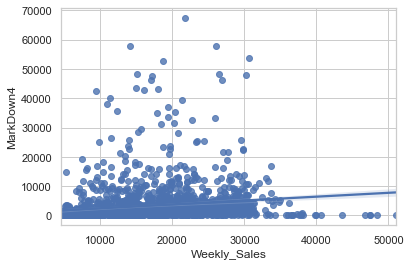

In [30]:
md4_sales = md4.groupby('MarkDown4')['Weekly_Sales'].mean().reset_index()
md4_sales = md4_sales.sort_values(by = 'Weekly_Sales')
sns.regplot(x= 'Weekly_Sales', y = 'MarkDown4', data = md4_sales )

<AxesSubplot:xlabel='Weekly_Sales', ylabel='MarkDown5'>

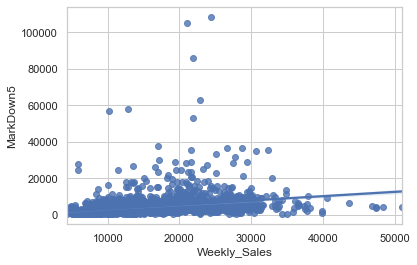

In [31]:
md5_sales = md5.groupby('MarkDown5')['Weekly_Sales'].mean().reset_index()
md5_sales = md5_sales.sort_values(by = 'Weekly_Sales')
sns.regplot(x= 'Weekly_Sales', y = 'MarkDown5', data = md5_sales )

## Modelling

### Naive projection

Assumption: No external factor impact the sales and next period sales depends solely on the previous sales. Forecasting using the moving average

In [32]:
sales = data.groupby('Date')['Weekly_Sales'].mean().reset_index()
sales = sales.sort_values('Date')
sales.shape

(182, 2)

In [33]:
df1 = data
df1['sales_pred'] = df1['Weekly_Sales'].rolling(52).mean().shift(1)
df1_naive = df1[['Weekly_Sales','sales_pred']].dropna()
df1_naive.head()

,Weekly_Sales,sales_pred
52,1409.34,15561.441538
53,1416.80,15109.226923
54,8414.14,14163.294808
55,5421.14,14060.872115
56,98499.12,13396.777885


In [363]:
from sklearn import metrics
from math import sqrt
actual = df1_naive['Weekly_Sales']
pred = df1_naive['sales_pred']
error = sqrt(metrics.mean_squared_error(actual, pred))
print('RMSE for naive method is: ', error)

RMSE for naive method is:  22573.55497210959


In [368]:
mse_naive = metrics.mean_squared_error(actual, pred)

### ARIMA

Assumptions: assuming stationary data. We need to check for stationary and eventually correct prior to modelling using ADF test

In [92]:
df = data[data['Weekly_Sales'] >0]

In [100]:
y= df.groupby(['Date'])['Weekly_Sales'].sum()

In [101]:
# Checking for stationarity using ADF test
# Null hypothesis: time series is non-stationary
# Alternative hypothesis: time series is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.837551
p-value: 0.000000
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


We get a negative value of the test statistic(-9.8) and this value is also lower than -3.4 which is the 1% critical value. This suggest that data is stationary which means that the sales are time dependant and does not requires differencing

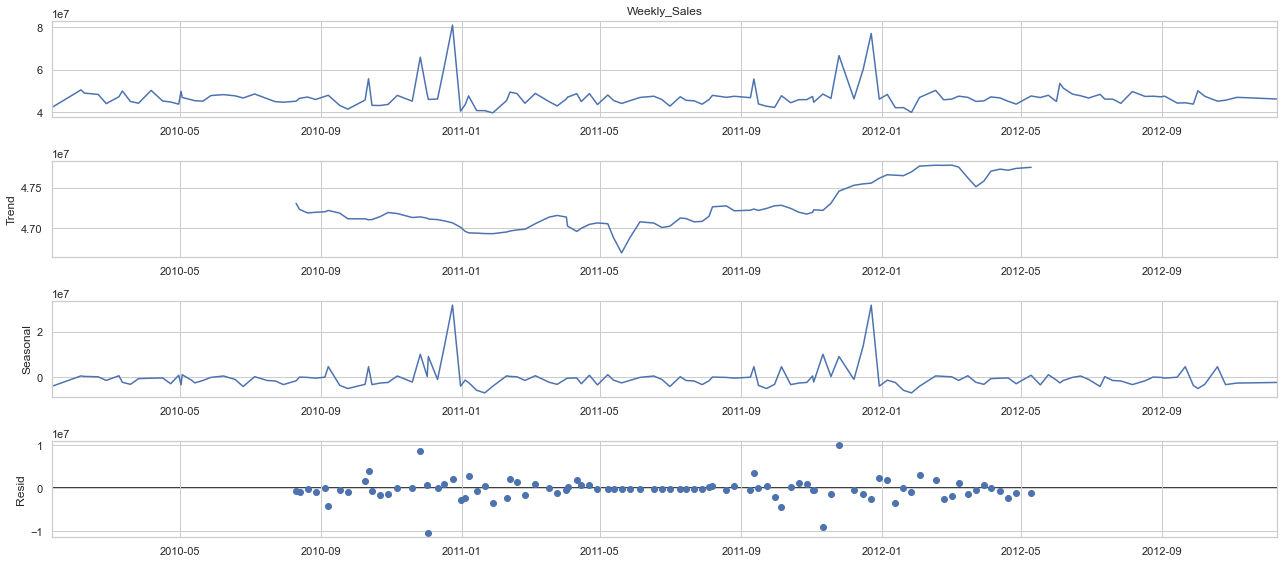

In [102]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y , model = 'additive', freq = 52)
fig = decomposition.plot()
plt.show()

Above graph confirm the stationarity wwith an upward trend. We notice the seasonal trend that was capture in the time series analysis. We choose a SARIMAX model that takes account of the seasonality unlike simple ARIMA models.

In [103]:
# Generate different combinations triplets parameters to be used for the grid search
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0],x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [104]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity = False,
                                        enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)(0, 0, 0, 12)12 - AIC:5424.790830884811
ARIMA(0, 0, 0)(0, 0, 1, 12)12 - AIC:4882.83695205993
ARIMA(0, 0, 0)(0, 1, 0, 12)12 - AIC:4509.044478649357
ARIMA(0, 0, 0)(0, 1, 1, 12)12 - AIC:4089.8965395958285
ARIMA(0, 0, 0)(1, 0, 0, 12)12 - AIC:4543.061864418845
ARIMA(0, 0, 0)(1, 0, 1, 12)12 - AIC:4510.907301329953
ARIMA(0, 0, 0)(1, 1, 0, 12)12 - AIC:4102.319525656159
ARIMA(0, 0, 0)(1, 1, 1, 12)12 - AIC:4076.3363751666698
ARIMA(0, 0, 1)(0, 0, 0, 12)12 - AIC:5290.963194474957
ARIMA(0, 0, 1)(0, 0, 1, 12)12 - AIC:4821.010142948222
ARIMA(0, 0, 1)(0, 1, 0, 12)12 - AIC:4470.40020450792
ARIMA(0, 0, 1)(0, 1, 1, 12)12 - AIC:4039.9789984877284
ARIMA(0, 0, 1)(1, 0, 0, 12)12 - AIC:4880.627170532489
ARIMA(0, 0, 1)(1, 0, 1, 12)12 - AIC:4807.938127244236
ARIMA(0, 0, 1)(1, 1, 0, 12)12 - AIC:4103.465372965792
ARIMA(0, 0, 1)(1, 1, 1, 12)12 - AIC:4035.3992376165356
ARIMA(0, 1, 0)(0, 0, 0, 12)12 - AIC:4843.922744737234
ARIMA(0, 1, 0)(0, 0, 1, 12)12 - AIC:4443.49480478562
ARIMA(0, 1, 0)(0, 1, 0, 12)

In [369]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,seasonal_period, pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(mse_dynamic), 2))
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 
                                                                                                                           2)))
    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results, mse_dynamic)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0836      0.148      0.565      0.572      -0.206       0.373
ma.L1         -0.7396      0.115     -6.451      0.000      -0.964      -0.515
ar.S.L12      -0.1529      0.192     -0.796      0.426      -0.529       0.223
ma.S.L12      -0.4970      0.144     -3.451      0.001      -0.779      -0.215
sigma2      7.799e+13    1.4e-15   5.59e+28      0.000     7.8e+13     7.8e+13


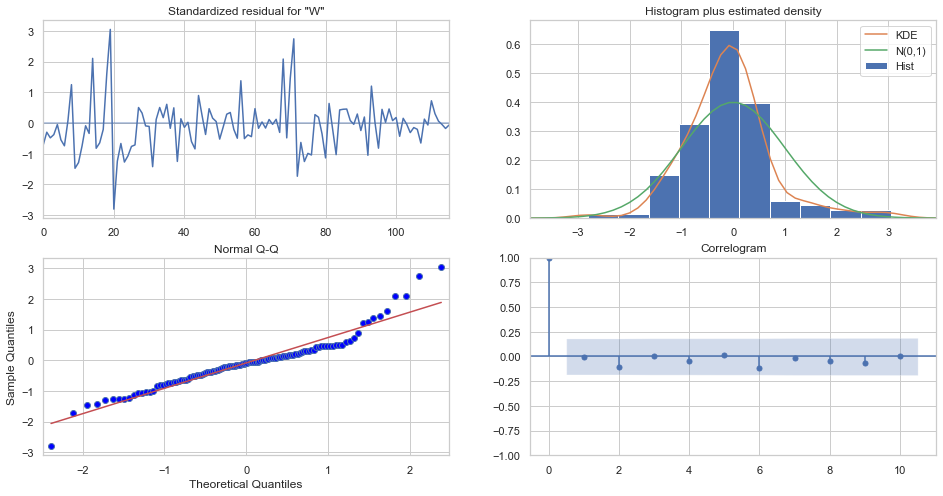

The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = False 6443606.72


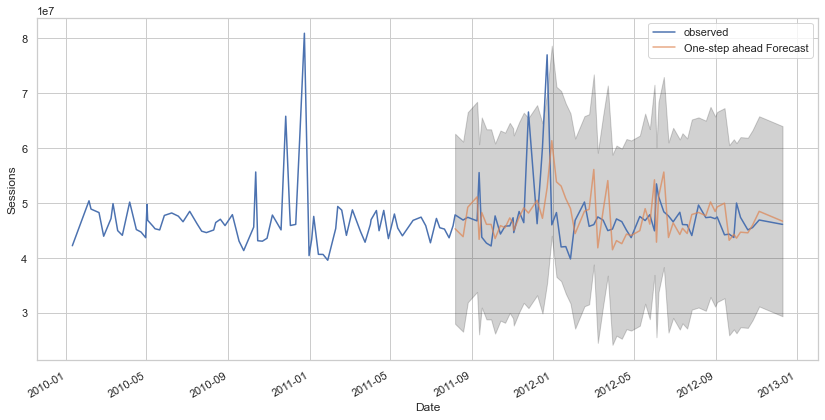

The Mean Squared Error of SARIMA with season_length=52 and dynamic = True 39097869703603
The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = True 6252828.94


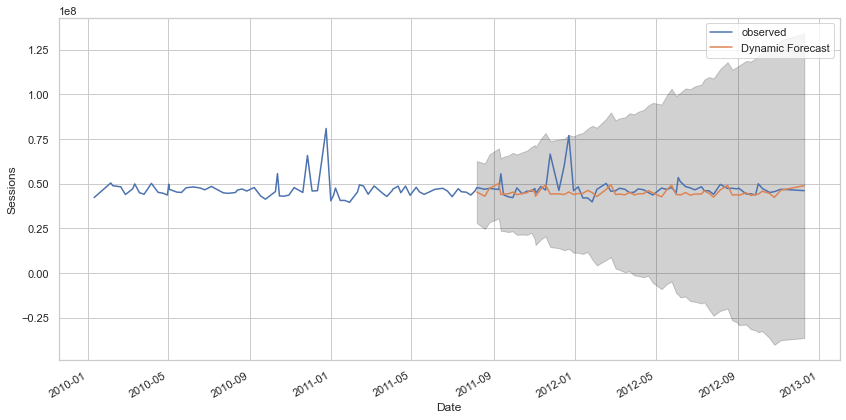

In [370]:
y_to_val = y[80:]
a = sarima_eva(y,52,'2011-08-07',y_to_val)